In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(
    "/Users/benoitmathey-doret/Documents/EPFL/ml-project-1-partie1team"
)

import datetime
from helpers import *
from implementation import *

In [2]:
datapath='/Users/benoitmathey-doret/Documents/EPFL/ML_course/projects/project1/data/dataset'

x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path=datapath,sub_sample=False)


In [3]:
#print features names
with open(datapath+'/x_train.csv', newline='') as csvfile: 
    csv_reader = csv.reader(csvfile)
    feature_names = next(csv_reader)
feature_names=feature_names[1:]
print(feature_names)


['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', 'EXRACT11'

In [4]:
# 1- Data shape
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)

print("Column Types:\n", x_train.dtype)

#print(x_train[1,:])

x_train Shape: (328135, 321)
x_test Shape: (109379, 321)
y_train Shape: (328135,)
Column Types:
 float64


In [5]:
#2- check Missing data
column_nan=np.isnan(x_train).sum(axis=0)
missing_data_percentages=column_nan/x_train.shape[0]*100
missing_data_percentages_array=np.array([[idx, miss] for idx, miss in enumerate(missing_data_percentages)])
missing_data_percentages_array

#missing_data_percentages_table = {i: missing_data_percentages[i-1] for i, name in enumerate(feature_names)}
#missing_data_percentages_table=list(missing_data_percentages_table.items())
#missing_data_percentages_table

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 0.00000000e+00],
       [5.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 0.00000000e+00],
       [9.00000000e+00, 4.24870861e+01],
       [1.00000000e+01, 4.24870861e+01],
       [1.10000000e+01, 9.99902479e+01],
       [1.20000000e+01, 4.24873909e+01],
       [1.30000000e+01, 4.24870861e+01],
       [1.40000000e+01, 9.99902479e+01],
       [1.50000000e+01, 4.24925717e+01],
       [1.60000000e+01, 4.25203041e+01],
       [1.70000000e+01, 4.25206089e+01],
       [1.80000000e+01, 5.75129139e+01],
       [1.90000000e+01, 5.75129139e+01],
       [2.00000000e+01, 5.75132186e+01],
       [2.10000000e+01, 5.75129139e+01],
       [2.20000000e+01, 9.97558932e+01],
       [2.30000000e+01, 5.75126091e+01],
       [2.400000

In [6]:
#basic statistic:
means=np.nanmean(x_train, axis=0)
std=np.nanstd(x_train, axis=0)
medians=np.nanmedian(x_train, axis=0)

basic_stat={name: [means[i],std[i], medians[i]] for i, name in enumerate(feature_names)}
print("Name, mean, std, median\n")
basic_stat

Name, mean, std, median



{'_STATE': [29.973651088728726, 16.031752874828946, 29.0],
 'FMONTH': [6.360689959925031, 3.487257208002934, 6.0],
 'IDATE': [6563638.198147104, 3489242.3515083175, 6242015.0],
 'IMONTH': [6.41666082557484, 3.492733670108343, 6.0],
 'IDAY': [14.496234781416186, 8.334482351946505, 14.0],
 'IYEAR': [2015.0247581026101, 0.15538706176966138, 2015.0],
 'DISPCODE': [1115.0148566900818, 35.721698553984595, 1100.0],
 'SEQNO': [2015005197.3278103, 4118.469112438906, 2015004270.0],
 '_PSU': [2015005197.3278103, 4118.469112438906, 2015004270.0],
 'CTELENUM': [1.0, 0.0, 1.0],
 'PVTRESD1': [1.000169563374311, 0.013020546170338806, 1.0],
 'COLGHOUS': [1.0, 0.0, 1.0],
 'STATERES': [1.0, 0.0, 1.0],
 'CELLFON3': [1.5446322594319628, 0.4980039773115641, 2.0],
 'LADULT': [1.65625, 0.47495887979908324, 2.0],
 'NUMADULT': [1.7938866572691334, 0.8000402332199626, 2.0],
 'NUMMEN': [0.8015704280238162, 0.6208866096671086, 1.0],
 'NUMWOMEN': [0.9919357404167329, 0.525994324575389, 1.0],
 'CTELNUM1': [1.0, 0.0,

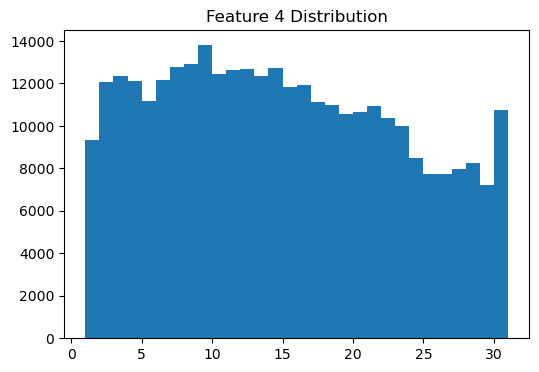

In [7]:
# Data distribution per features
#chose which features to display
#for i in range(x_train.shape[1]):
plt.figure(figsize=(6, 4))
plt.hist(x_train[:, 4], bins=30)
plt.title(f'Feature {4} Distribution')
plt.show()

Correlation Matrix:
 [[ 1.         -0.01966496 -0.00683842 ...         nan         nan
          nan]
 [-0.01966496  1.          0.86902998 ...         nan         nan
          nan]
 [-0.00683842  0.86902998  1.         ...         nan         nan
          nan]
 ...
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


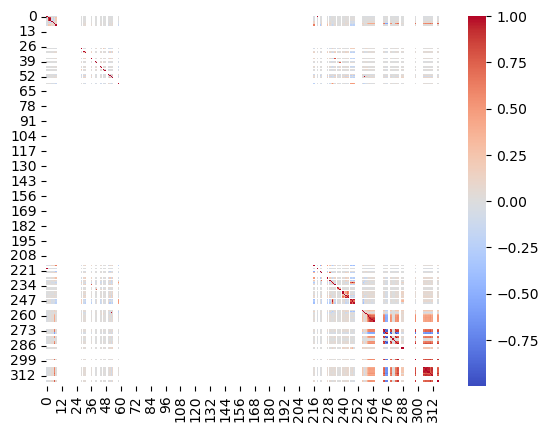

In [8]:
#correlation Matrix
corr_matrix = np.corrcoef(x_train.T)
print("Correlation Matrix:\n", corr_matrix)

# Visualize with a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [9]:
#variance and correlation analysis
threshold_var=1
variances = np.nanvar(x_train, axis=0)
low_variance_features = np.where(variances < threshold_var)  # Define your threshold
print("Low Variance Features:", low_variance_features)

# Identify features highly correlated with others (above a threshold)
threshold = 0.85
correlated_features = np.where(np.abs(corr_matrix) > threshold)
print("Highly Correlated Features:", correlated_features)

Low Variance Features: (array([  5,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  30,  31,  32,  35,  36,  38,  39,  40,  42,
        43,  44,  45,  46,  47,  48,  50,  53,  54,  56,  57,  61,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  87,  95,
        97,  99, 100, 108, 109, 116, 117, 118, 123, 124, 127, 133, 134,
       135, 136, 141, 142, 144, 146, 155, 156, 157, 158, 159, 162, 163,
       164, 165, 169, 170, 172, 176, 177, 179, 181, 182, 199, 203, 205,
       214, 215, 217, 221, 228, 230, 232, 234, 235, 236, 237, 238, 241,
       245, 247, 251, 254, 266, 268, 269, 270, 271, 272, 274, 275, 280,
       281, 282, 283, 289, 290]),)
Highly Correlated Features: (array([  0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   3,   4,   5,
         6,   7,   7,   8,   8,  28,  30,  31,  36,  39,  40,  43,  44,
        46,  47,  50,  51,  52,  52,  53,  58, 216, 219, 219, 221, 222,
       227, 229, 230, 231, 231, 232, 233, 235, 2

The target variable is _MICHD


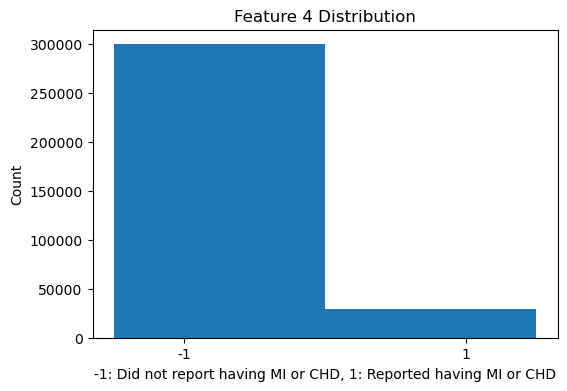

/opt/anaconda3/envs/ML/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/ML/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


GENHLTH
LADULT
CVDASPRN
_AGE80
_AGEG5YR
EMPLOY1
_AGE_G
BPHIGH4
_HCVU651
_AGE65YR
_RFHLTH
_RFHYPE5
_DRDXAR1
DIABETE3
DRADVISE
USEEQUIP
DIFFWALK
HAVARTH3
ARTTODAY
ASERVIST
QLACTLM2
CHILDREN
TOLDHI2
LASTPAP2
PCPSADE1
_RFCHOL
ACTIN11_
INTERNET
CDASSIST
PNEUVAC3


In [10]:

#Target variable exploratory
target_name='_MICHD'
print("The target variable is", target_name)

plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=[-1.5, 0, 1.5])
plt.xticks([-1, 1], ['-1', '1'])
plt.title(f'Feature {4} Distribution')
plt.xlabel('-1: Did not report having MI or CHD, 1: Reported having MI or CHD')
plt.ylabel('Count')
plt.show()

#correlation
target=y_train
correlations = []
for i in range(x_train.shape[1]):
    feature = x_train[:, i]
    
    # Create a mask to filter out NaN values in both feature and target
    valid_mask = ~np.isnan(feature) & ~np.isnan(target)
    
    # Only compute correlation on the valid data (where neither feature nor target is NaN)
    if np.sum(valid_mask) > 1:  # Ensure there are enough valid points to compute correlation
        corr = np.corrcoef(feature[valid_mask], target[valid_mask])[0, 1]
    else:
        corr = np.nan  # Not enough valid data to compute correlation
    
    correlations.append((corr))
#for i, corr in enumerate(correlations):
    #print(f"Feature {i} correlation with target: {corr}")

indices = np.arange(len(correlations))  # Use np.arange for clarity
correlation_table = np.column_stack((indices, correlations))

# Filter out NaN values from the correlation coefficients
filtered_array = correlation_table[~np.isnan(correlation_table[:, 1])]

# Sort the filtered array by the second column (correlation coefficients) in descending order
sorted_array = filtered_array[abs(filtered_array[:, 1]).argsort()[::-1]]
# Keep only the top 20 rows (or fewer if you have less than 20 values)
top_20 = sorted_array[:30]

# Extract the indices of the top 20 features
index_top20 = top_20[:, 0].astype(int)  # No need for squeeze here
for i in index_top20:
    print(feature_names[i])


In [37]:
def DataProcessingTop20(x,y):
    #correlation
    target=y
    x_train=x
    correlations = []
    for i in range(x_train.shape[1]):
        feature = x_train[:, i]
        
        # Create a mask to filter out NaN values in both feature and target
        valid_mask = ~np.isnan(feature) & ~np.isnan(target)
        
        # Only compute correlation on the valid data (where neither feature nor target is NaN)
        if np.sum(valid_mask) > 1:  # Ensure there are enough valid points to compute correlation
            corr = np.corrcoef(feature[valid_mask], target[valid_mask])[0, 1]
        else:
            corr = np.nan  # Not enough valid data to compute correlation
        
        correlations.append((corr))
    #for i, corr in enumerate(correlations):
        #print(f"Feature {i} correlation with target: {corr}")

    indices = np.arange(len(correlations))  # Use np.arange for clarity
    correlation_table = np.column_stack((indices, correlations))

    # Filter out NaN values from the correlation coefficients
    filtered_array = correlation_table[~np.isnan(correlation_table[:, 1])]

    # Sort the filtered array by the second column (correlation coefficients) in descending order
    sorted_array = filtered_array[abs(filtered_array[:, 1]).argsort()[::-1]]
    # Keep only the top 20 rows (or fewer if you have less than 20 values)
    top_20 = sorted_array[:30]
    index_top20 = top_20[:, 0].astype(int)  # No need for squeeze here

    #check for missing data in top20
    miss_data_top20=missing_data_percentages_array[index_top20,:]
    #remove >70%
    filtered_miss_data=miss_data_top20[np.where(miss_data_top20[:,1]<70),:].squeeze()
    #print(filtered_miss_data)

    index_rows=np.array(range(x_train.shape[0]))
    index_=filtered_miss_data[:,0].astype(int)
    
    dataset_top20=x_train[:,index_]
    dataset_top20_filtred=dataset_top20[~np.isnan(dataset_top20).any(axis=1)]
    index_rows=index_rows[~np.isnan(dataset_top20).any(axis=1)]

    #y
    y_train_top20=y_train[index_rows]
    
    #normalisation
    means=np.mean(dataset_top20_filtred, axis=0)
    std=np.std(dataset_top20_filtred, axis=0)
    dataset_top20_filtred_norm=(dataset_top20_filtred-means)/std
    

    return dataset_top20_filtred_norm, y_train_top20, index_rows, index_

In [41]:
x_train_top20, y_train_top20, index_rows, idx_features=DataProcessingTop20(x_train,y_train)

for idx, i in enumerate(idx_features):
    print(f"Freatures {i}:", feature_names[i])

np.savetxt("Datasets/x_train_top20.csv", x_train_top20, delimiter=",", fmt='%d')
np.savetxt("Datasets/y_train_top20.csv", y_train_top20, delimiter=",", fmt='%d')


/opt/anaconda3/envs/ML/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/ML/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Freatures 26: GENHLTH
Freatures 248: _AGE80
Freatures 246: _AGEG5YR
Freatures 58: EMPLOY1
Freatures 249: _AGE_G
Freatures 34: BPHIGH4
Freatures 231: _HCVU651
Freatures 247: _AGE65YR
Freatures 230: _RFHLTH
Freatures 232: _RFHYPE5
Freatures 238: _DRDXAR1
Freatures 48: DIABETE3
Freatures 66: USEEQUIP
Freatures 69: DIFFWALK
Freatures 45: HAVARTH3
Freatures 65: QLACTLM2
Freatures 59: CHILDREN
Freatures 38: TOLDHI2
Freatures 234: _RFCHOL
Freatures 289: ACTIN11_
Freatures 61: INTERNET
Freatures 103: PNEUVAC3
